<a href="https://colab.research.google.com/github/jiayeye28/BDML-Life-Insurance/blob/main/BDML_Model_(UNDERSAMPLED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, log_loss, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# mblearn library
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

In [ ]:
!pip install scikit-plot
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Importing Data**

In [ ]:
# Load the cleaned CSV data file into a Pandas dataframe.
LINK = 'https://raw.githubusercontent.com/mwang164/Prudential-Life-Insurance-Assessment/main/Cleaned_Prudential.csv'
df = pd.read_csv(LINK)

In [ ]:
# Set 'id' as the index column
df.set_index('Id', inplace=True)

print(df.shape)

df.head()

(44698, 137)


,Product_Info_4,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_4,...,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
Id,,,,,,,,,,,,,,,,,,,,,
72703,-1.022042,0.462687,0.763636,0.253138,0.355682,-2.536831,-6.702620e+10,0.25,-549693.333254,0.676056,...,0,0,0,0,0,0,0,0,0,8
6534,-0.651127,0.507463,0.818182,0.330544,0.409190,-2.162801,-6.702620e+10,0.20,-953121.904684,0.535211,...,0,0,0,0,1,0,0,0,0,8
39746,0.009960,0.388060,0.709091,0.251046,0.400535,-1.416588,-3.858239e+10,1.00,-332807.634238,0.507042,...,0,0,0,0,0,0,0,1,0,8
51932,-1.235182,0.238806,0.581818,0.215481,0.487645,-2.645368,-6.702620e+10,0.30,-694818.515544,0.450704,...,0,0,0,0,0,0,1,0,0,8
19227,-0.651127,0.268657,0.672727,0.200837,0.344810,-1.926542,-6.702620e+10,0.10,-549693.333254,0.408451,...,0,0,0,0,0,0,0,0,0,8


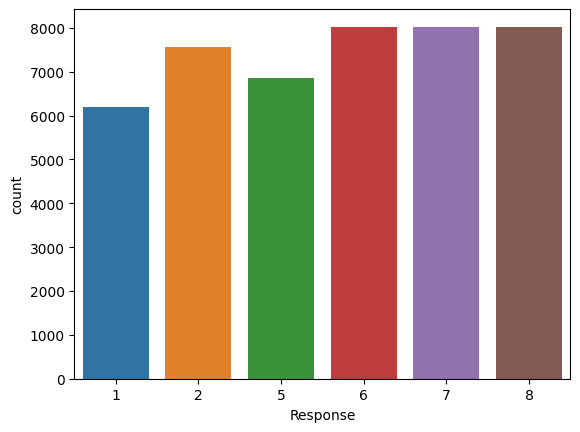

In [ ]:
sns.countplot(x=df['Response']);

## **Feature Importance**




In [ ]:
# sample_df = df.sample(10000,random_state=12345)  # Randomly sample 10,000 of the reviews
X = df.drop(['Response'],axis=1)
y = df['Response']

In [ ]:
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(X,y)

RandomForestRegressor(n_estimators=1000)

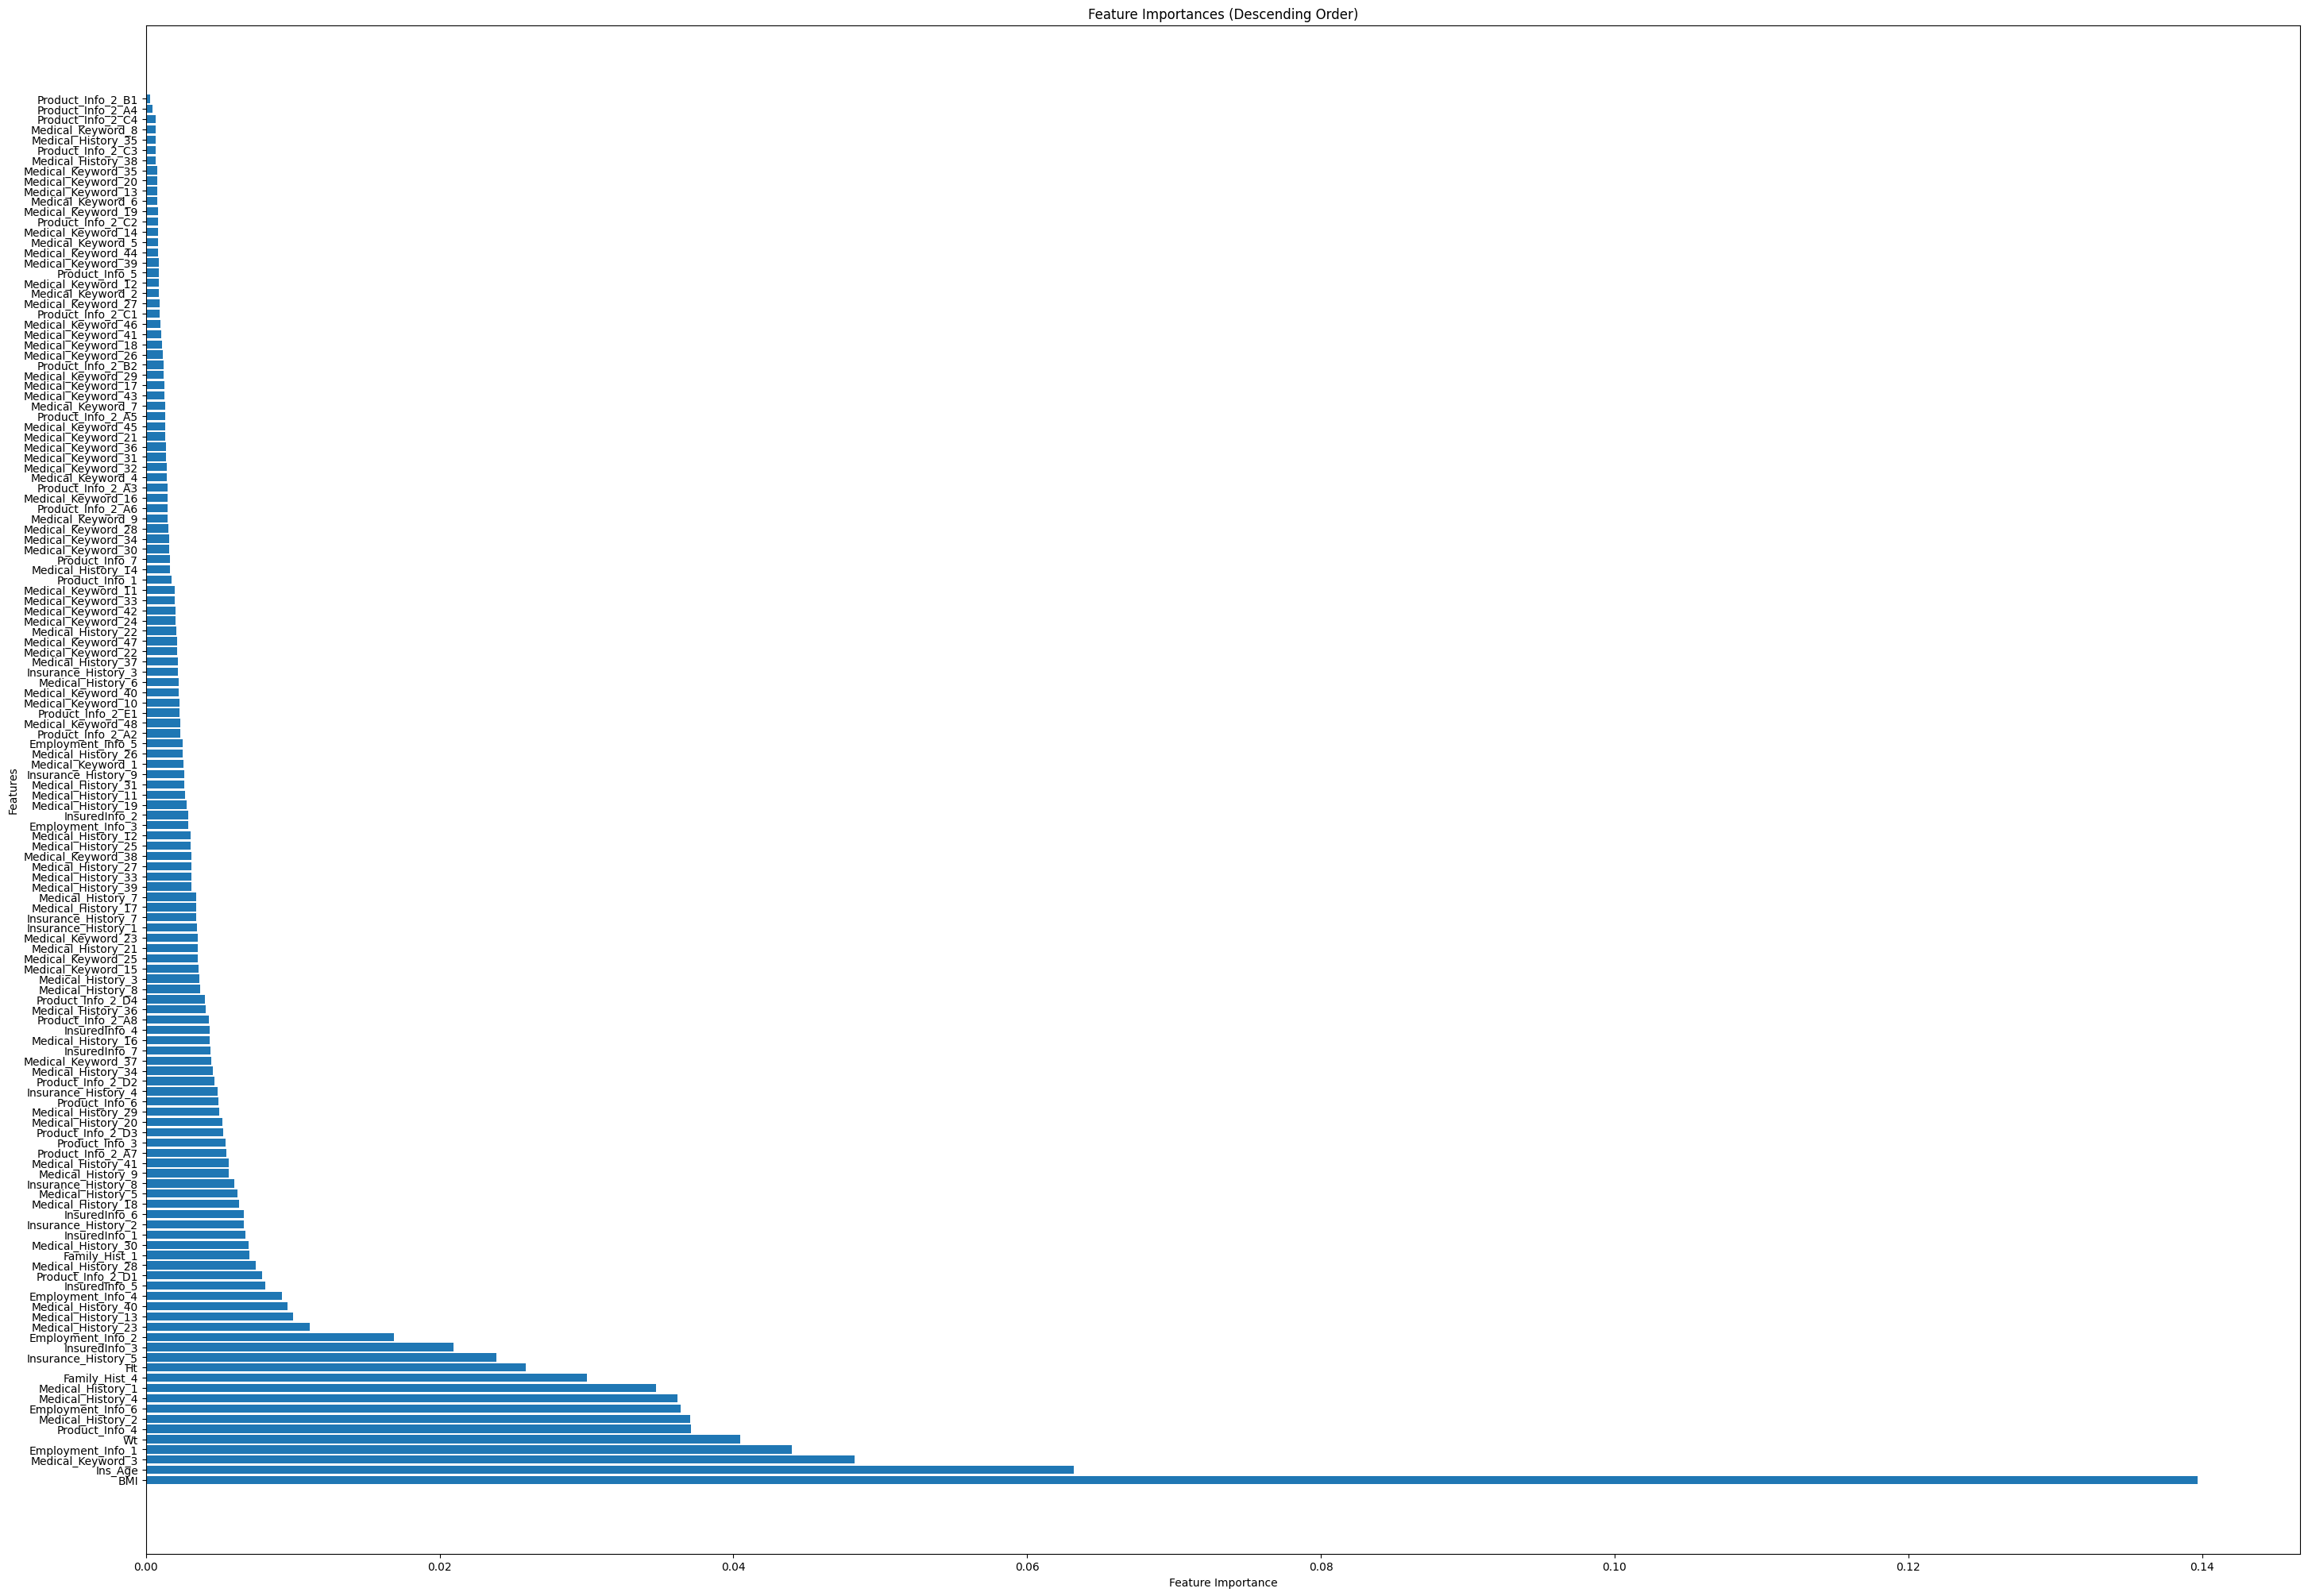

In [ ]:
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

plt.figure(figsize=(35,25))
plt.barh(X.columns[indices], feature_importances[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances (Descending Order)")
plt.show()


In [ ]:
X.columns[indices][:35]

Index(['BMI', 'Ins_Age', 'Medical_Keyword_3', 'Employment_Info_1', 'Wt',
       'Product_Info_4', 'Medical_History_2', 'Employment_Info_6',
       'Medical_History_4', 'Medical_History_1', 'Family_Hist_4', 'Ht',
       'Insurance_History_5', 'InsuredInfo_3', 'Employment_Info_2',
       'Medical_History_23', 'Medical_History_13', 'Medical_History_40',
       'Employment_Info_4', 'InsuredInfo_5', 'Product_Info_2_D1',
       'Medical_History_28', 'Family_Hist_1', 'Medical_History_30',
       'InsuredInfo_1', 'Insurance_History_2', 'InsuredInfo_6',
       'Medical_History_18', 'Medical_History_5', 'Insurance_History_8',
       'Medical_History_9', 'Medical_History_41', 'Product_Info_2_A7',
       'Product_Info_3', 'Product_Info_2_D3'],
      dtype='object')

In [ ]:
# important features
imp_feature = ['BMI', 'Ins_Age', 'Medical_Keyword_3', 'Employment_Info_1', 'Wt',
       'Product_Info_4', 'Medical_History_2', 'Employment_Info_6',
       'Medical_History_4', 'Medical_History_1', 'Family_Hist_4', 'Ht',
       'Insurance_History_5', 'InsuredInfo_3', 'Employment_Info_2',
       'Medical_History_23', 'Medical_History_13', 'Medical_History_40',
       'Employment_Info_4', 'InsuredInfo_5', 'Product_Info_2_D1',
       'Medical_History_28', 'Family_Hist_1', 'Medical_History_30',
       'InsuredInfo_1', 'Insurance_History_2', 'InsuredInfo_6',
       'Medical_History_18', 'Medical_History_5', 'Insurance_History_8',
       'Medical_History_9', 'Medical_History_41', 'Product_Info_2_A7',
       'Product_Info_3', 'Product_Info_2_D3']
X_imp = df[imp_feature]
y = df['Response']

## **Holdout Sampling**

In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
    train_test_split(X_imp, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0,
                     stratify=y)
print('Shape of X and y',X_imp.shape, y.shape,
      '\nShape of training set X and y',X_train.shape, y_train.shape,
      '\nShape of test set X and y',X_test.shape, y_test.shape)


Shape of X and y (44698, 35) (44698,) 
Shape of training set X and y (35758, 35) (35758,) 
Shape of test set X and y (8940, 35) (8940,)


#**Horse Race**

In [ ]:
# Horse Race

names = ["Decision Tree", "SVM(poly)","SVM(rbf)","MLP", "Random Forest", "XGBoost", "Light GBM(multi)", "Light GBM(softmax)", "AdaBoost"]
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    SVC(kernel='poly', probability=True, max_iter=1000, random_state=0),
    SVC(kernel='rbf',probability=True,max_iter=1000,random_state=0),
    MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500),
    RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3),
    LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_leaves=50,
               learning_rate=0.1, reg_lambda=0.2),
    LGBMClassifier(boosting_type='gbdt', objective='softmax', num_leaves=50,
               learning_rate=0.1, reg_lambda=0.2),
    AdaBoostClassifier(random_state=0)]

for name, clf in zip(names, classifiers):
  # Pipeline
  estimators = []
  estimators.append(('MinMax', MinMaxScaler()))
  estimators.append(('classifier',clf))
  model = Pipeline(estimators)
  # Encode class labels
  le = LabelEncoder()
  y_encoded = le.fit_transform(y)
  # Eval Pipeline
  kfold_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=11)
  scoring = ['accuracy','roc_auc_ovr']
  for sc in scoring:
    results = cross_val_score(model, X=X_imp, y=y_encoded, cv=kfold_cv, scoring=sc)
    print('Classifier: %s Metric %s mean (std deviation): %.3f (%.3f)' % (name, sc, results.mean(), results.std()))


Classifier: Decision Tree Metric accuracy mean (std deviation): 0.402 (0.003)
Classifier: Decision Tree Metric roc_auc_ovr mean (std deviation): 0.718 (0.002)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classifier: SVM(poly) Metric accuracy mean (std deviation): 0.257 (0.010)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classifier: SVM(poly) Metric roc_auc_ovr mean (std deviation): 0.627 (0.009)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classifier: SVM(rbf) Metric accuracy mean (std deviation): 0.329 (0.011)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Classifier: SVM(rbf) Metric roc_auc_ovr mean (std deviation): 0.696 (0.008)
Classifier: MLP Metric accuracy mean (std deviation): 0.426 (0.001)
Classifier: MLP Metric roc_auc_ovr mean (std deviation): 0.765 (0.002)
Classifier: Random Forest Metric accuracy mean (std deviation): 0.392 (0.005)
Classifier: Random Forest Metric roc_auc_ovr mean (std deviation): 0.737 (0.002)
Classifier: XGBoost Metric accuracy mean (std deviation): 0.442 (0.001)
Classifier: XGBoost Metric roc_auc_ovr mean (std deviation): 0.776 (0.001)
Classifier: Light GBM(multi) Metric accuracy mean (std deviation): 0.446 (0.003)
Classifier: Light GBM(multi) Metric roc_auc_ovr mean (std deviation): 0.780 (0.001)
Classifier: Light GBM(softmax) Metric accuracy mean (std deviation): 0.446 (0.003)
Classifier: Light GBM(softmax) Metric roc_auc_ovr mean (std deviation): 0.780 (0.001)
Classifier: AdaBoost Metric accuracy mean (std deviation): 0.416 (0.003)
Classifier: AdaBoost Metric roc_auc_ovr mean (std deviation): 0.742 (0.0

## **Leaderboard**
|**Classifier** |    Accuracy    |
|:----------------------|:------------:|
|Light GBM(softmax)|0.446  |
|XGBoost| 0.442 |
|MLP|0.426 |
|AdaBoost| 0.416 |
|Decision Tree|0.402 |
|Random forest|0.392  |
|SVM(rbf)|0.329 |
|SVM(poly)|0.257 |


#**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm)

print("Checking: mean of column 0 of X_train:",X_train_norm[0].mean(), " and its std deviation:", X_train_norm[0].std())

[[0.50461804 0.71428571 0.         ... 0.         0.68571429 0.        ]
 [0.         0.         0.         ... 0.         0.37142857 0.        ]
 [0.7981584  1.         0.         ... 0.         0.68571429 0.        ]
 ...
 [0.57942525 1.         0.         ... 0.         0.22857143 0.        ]
 [0.70041473 0.42857143 0.         ... 0.         0.68571429 0.        ]
 [0.31574057 0.83333333 1.         ... 0.         0.68571429 1.        ]]
Checking: mean of column 0 of X_train: 0.33154495686766455  and its std deviation: 0.33270477959174827


# **Classifiers**

## **Gridsearch Classifier**

In [ ]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 12) - "use_label_encoder" has since become deprecated.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert each set of class labels (1,2,5,6,7,8) into encoded labels (0-5).
y_en = le.fit_transform(y)
y_train=le.fit_transform(y_train)
y_test = le.transform(y_test)

## **XGBoost**

In [ ]:
param_grid = {
    'max_depth': [5,7,9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [5, 10, 15],
    'n_estimators': [100, 200, 300],
}

clf = XGBClassifier(objective='multi:softprob',
                    num_class= 6 ,
                    booster='gbtree',
                    eval_metric='mlogloss',
                    tree_method='gpu_hist', gpu_id=0, # Boosting with Colab GPU support
                    grow_policy='lossguide',
                    use_label_encoder=False)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding balaced_accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.4f}".format(grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best hyperparameters:  {'gamma': 5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best accuracy: 0.4480


## **Lightgbm**

In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01,0.05],
    'n_estimators': [100, 200, 500],
    'colsample_bytree': [0.5, 0.7]
      }

# Define the LightGBM classifier with the fixed hyperparameters
lgbm_clf = LGBMClassifier(boosting_type='gbdt',objective='multiclass', num_classes=6, n_jobs=-1)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train_norm, y_train)

# Print the best hyperparameters and the corresponding mean test score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean test score: ", grid_search.best_score_)

# Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 63}
# Best mean test score:  0.45189889510298303

Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 63}
Best mean test score:  0.45189889510298303


## **Stack Model**

### **MLP, XGB | LGBM**

In [ ]:
## Test of MLP as Level 0

from sklearn.ensemble import StackingClassifier

# Define the level-0 models
mlp_model = MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=6, gamma= 5, booster='gbtree', learning_rate=0.2, max_depth=5,n_estimators=100)

# Define the level-1 model
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=6, learning_rate=0.01,
                           n_estimators=500, num_leaves=63,colsample_bytree= 0.5)

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('XGB', xgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=lgb_model)

# Define the hyperparameters to search over
param_grid = {
    'final_estimator__min_child_samples': [20],
    'final_estimator__reg_alpha': [0.1],
    'final_estimator__reg_lambda': [0.1]
}

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))



Best: 0.442670 using {'final_estimator__min_child_samples': 20, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 0.1}


### **MLP, LGBM | XGB**

In [ ]:
## Test of MLP as Level 0

from sklearn.ensemble import StackingClassifier

# Define the level-0 models
mlp_model = MLPClassifier(hidden_layer_sizes=(20,20),alpha=1, max_iter=500)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=6, learning_rate=0.01,
                           n_estimators=500, num_leaves=63,colsample_bytree= 0.5)


# Define the level-1 model
xgb_model = XGBClassifier(objective='multi:softprob', num_class=6, gamma= 5, booster='gbtree', learning_rate=0.2, max_depth=5,n_estimators=100)

# Define the stacking ensemble
level0 = [('MLP', mlp_model), ('LGB', lgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=xgb_model)

# Define the hyperparameters to search over
param_grid = {
    'final_estimator__min_child_samples': [20],
    'final_estimator__reg_alpha': [0.1],
    'final_estimator__reg_lambda': [0.1]
}

# Perform grid search using cross-validation
gsearch = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))



[20:13:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

Best: 0.445131 using {'final_estimator__min_child_samples': 20, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 0.1}


### **RF, XGB | LGBM**

In [ ]:
## Test of RF as level 0

from sklearn.ensemble import StackingClassifier

# Define the level-0 models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
xgb_model = XGBClassifier(objective='multi:softprob', num_class=6, gamma= 5, booster='gbtree', learning_rate=0.2, max_depth=5,n_estimators=100)

# Define the level-1 model
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=6, learning_rate=0.01,
                           n_estimators=500, num_leaves=63,colsample_bytree= 0.5)

# Define the stacking ensemble
level0 = [('RF', rf_model), ('XGB', xgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=lgb_model)

# Define the hyperparameters to search over
param_grid = {
    'final_estimator__min_child_samples': [20],
    'final_estimator__reg_alpha': [0.1],
    'final_estimator__reg_lambda': [0.1]
}

# Perform grid search using cross-validation
gsearch1 = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch1.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch1.best_score_, gsearch1.best_params_))

# Best: 0.440824 using {'final_estimator__min_child_samples': 20, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 0.1}

Best: 0.440824 using {'final_estimator__min_child_samples': 20, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 0.1}


### **RF, LGBM | XGB**

In [ ]:
## Test of RF as level

from sklearn.ensemble import StackingClassifier

# Define the level-0 models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=6, learning_rate=0.01,
                           n_estimators=500, num_leaves=63,colsample_bytree= 0.5)


# Define the level-1 model
xgb_model = XGBClassifier(objective='multi:softprob', num_class=6, gamma= 5, booster='gbtree', learning_rate=0.2, max_depth=5,n_estimators=100)
# Define the stacking ensemble
level0 = [('RF', rf_model), ('LGB', lgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=xgb_model)

# Define the hyperparameters to search over
param_grid = {
    'final_estimator__min_child_samples': [10],
    'final_estimator__reg_alpha': [0.1],
    'final_estimator__reg_lambda': [0.1]
}

# Perform grid search using cross-validation
gsearch2 = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch2.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch2.best_score_, gsearch2.best_params_))


[19:33:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

Best: 0.448151 using {'final_estimator__min_child_samples': 10, 'final_estimator__reg_alpha': 0.1, 'final_estimator__reg_lambda': 0.1}


### **Stacked Models Leaderboard**
|**Classifier** |    Accuracy    |
|:----------------------|:------------:|
|RF, LGBM - XGB|0.448 |
|MLP, LGBM - XGB| 0.445 |
|MLP, XGB - LGBM| 0.443 |
|RF, XGB - LGBM|0.441 |



### **Winner Grid Search: RF, LGBM | XGB**



In [ ]:
## Test of RF as level 0

from sklearn.ensemble import StackingClassifier

# Define the level-0 models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
lgb_model = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_class=6, learning_rate=0.01,
                           n_estimators=500, num_leaves=63,colsample_bytree= 0.5)


# Define the level-1 model
xgb_model = XGBClassifier(objective='multi:softprob', num_class=6, gamma= 5, booster='gbtree', learning_rate=0.2, max_depth=5,n_estimators=100, min_child_samples=100)
# Define the stacking ensemble
level0 = [('RF', rf_model), ('LGB', lgb_model)]
ensemble = StackingClassifier(estimators=level0, final_estimator=xgb_model)

# Define the hyperparameters to search over
param_grid = {
    'final_estimator__reg_alpha': [0.1, 0.5,1],
    'final_estimator__reg_lambda': [0.1, 0.5,1]
}

# Perform grid search using cross-validation
gsearch_final = GridSearchCV(estimator=ensemble, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gsearch_final.fit(X_train_norm, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (gsearch_final.best_score_, gsearch_final.best_params_))


### **Final Leaderboard**
|**Classifier** |    Accuracy    |
|:----------------------|:------------:|
|Light GBM| 0.452 |
|Stacked Classifier|0.449 |
|XGBoost| 0.448 |




## **Fitting**

In [ ]:
# xgb model fit
xgb_model.fit(X_train_norm,y_train)
# lgbm model fit
lgb_model.fit(X_train_norm,y_train)
# Train the stacked model on the full training set with the best hyperparameters
stacked_model = gsearch_final.best_estimator_
stacked_model.fit(X_train_norm, y_train)

[23:42:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.

[23:46:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_samples" } are not used.



StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(max_depth=3,
                                                       random_state=42)),
                               ('LGB',
                                LGBMClassifier(colsample_bytree=0.5,
                                               learning_rate=0.01,
                                               n_estimators=500, num_class=6,
                                               num_leaves=63,
                                               objective='multiclass'))],
                   final_estimator=XGBClassifier(base_score=None,
                                                 booster='gbtree',
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsam...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_samples=100,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_class=6,
                                                 num_parallel_tree=None, ...))

## **Prediction**

In [ ]:
# predict probability
xgb_model_PredProb = xgb_model.predict_proba(X_test_norm)
lgb_model_PredProb = lgb_model.predict_proba(X_test_norm)
stacked_model_PredProb = stacked_model.predict_proba(X_test_norm)

# converting probabilities into label predictions
xgb_model_PredClass = np.argmax(xgb_model_PredProb, axis=1)
xgb_model_PredClass = le.inverse_transform(xgb_model_PredClass)

lgb_model_PredClass = np.argmax(lgb_model_PredProb, axis=1)
lgb_model_PredClass = le.inverse_transform(lgb_model_PredClass)

stacked_model_PredClass = np.argmax(stacked_model_PredProb, axis=1)
stacked_model_PredClass = le.inverse_transform(stacked_model_PredClass)


## **Evaluation**

In [ ]:
# Inverse transfer y
y_test = le.inverse_transform(y_test)

Text(0.5, 1.0, 'XGB ROC Curve')

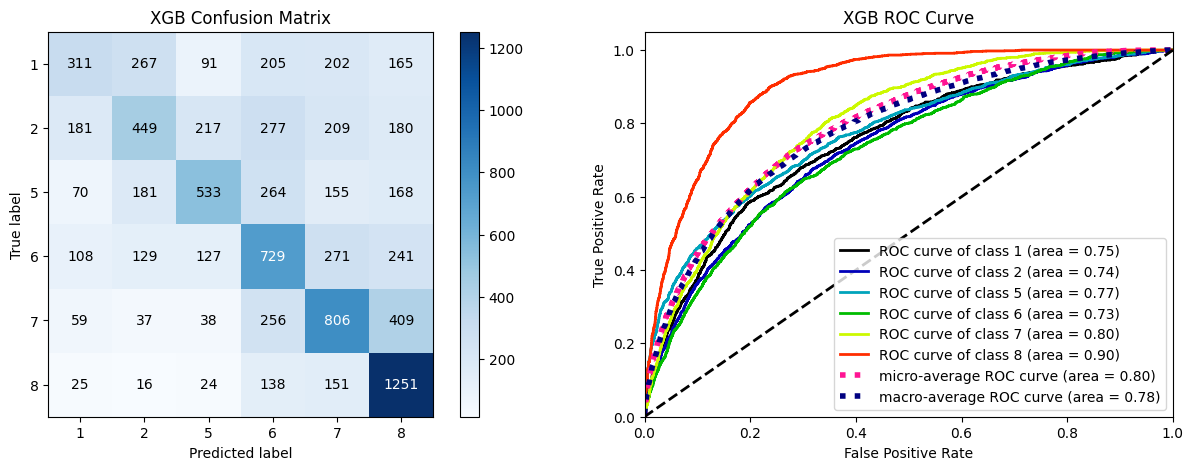

In [ ]:
# evaluate XGB model
xgb_cm = confusion_matrix(y_test, xgb_model_PredClass)
xgb_acc = accuracy_score(y_test, xgb_model_PredClass)
xgb_roc_auc = roc_auc_score(y_test, xgb_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, xgb_model_PredClass, ax=ax1)
ax1.set_title('XGB Confusion Matrix')
plot_roc(y_test, xgb_model_PredProb, ax=ax2)

ax2.set_title('XGB ROC Curve')


Text(0.5, 1.0, 'LGBM ROC Curve')

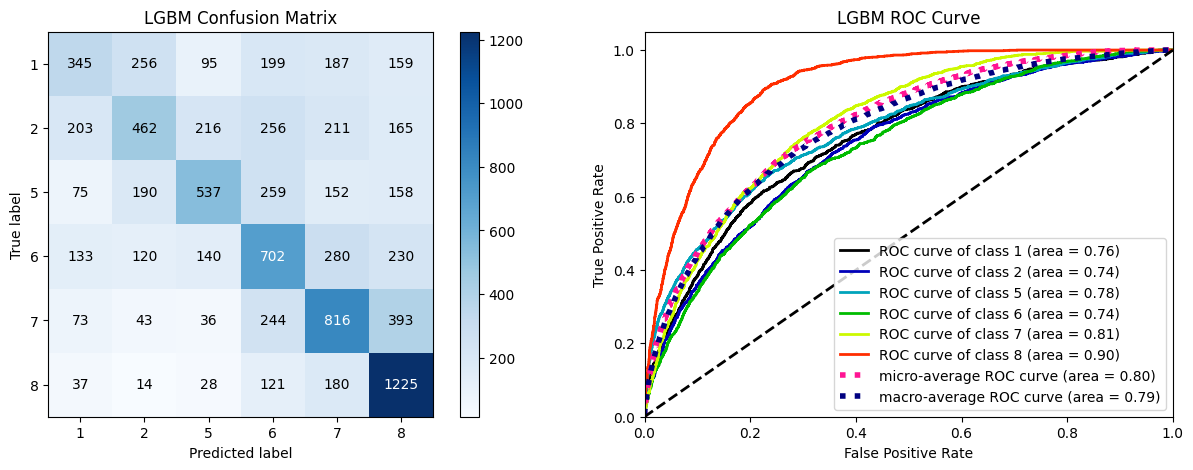

In [ ]:
# evaluate LGB model
lgb_cm = confusion_matrix(y_test, lgb_model_PredClass)
lgb_acc = accuracy_score(y_test, lgb_model_PredClass)
lgb_roc_auc = roc_auc_score(y_test, lgb_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, lgb_model_PredClass, ax=ax1)
ax1.set_title('LGBM Confusion Matrix')
plot_roc(y_test, lgb_model_PredProb, ax=ax2)

ax2.set_title('LGBM ROC Curve')


Text(0.5, 1.0, 'Stacked ROC Curve')

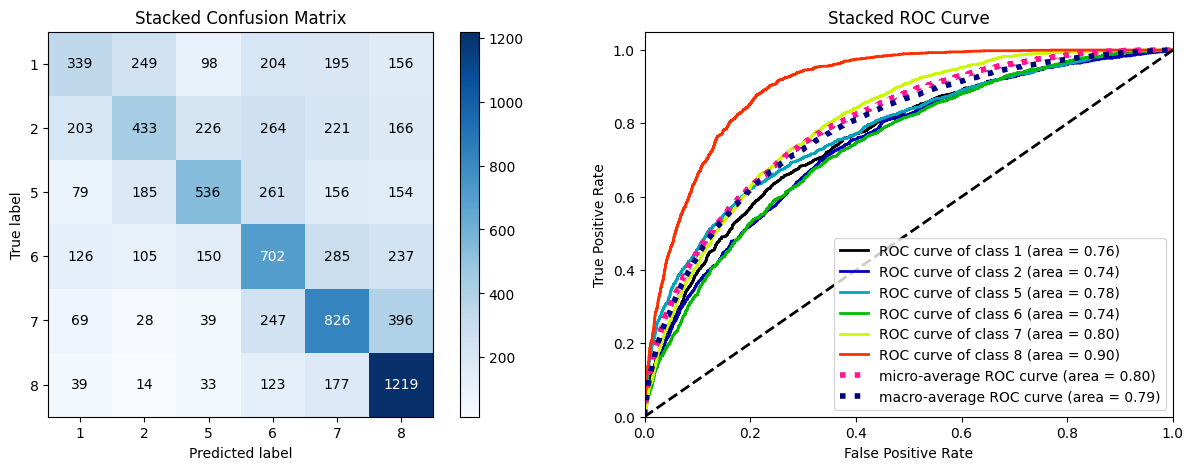

In [ ]:

# evaluate stacked model
stacked_cm = confusion_matrix(y_test, stacked_model_PredClass)
stacked_acc = accuracy_score(y_test, stacked_model_PredClass)
stacked_roc_auc = roc_auc_score(y_test, stacked_model_PredProb, multi_class='ovr')

# plot confusion matrix and ROC-AUC curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(y_test, stacked_model_PredClass, ax=ax1)
ax1.set_title('Stacked Confusion Matrix')
plot_roc(y_test, stacked_model_PredProb, ax=ax2)
ax2.set_title('Stacked ROC Curve')



In [ ]:
# calculate classification report for each model
print("XGBoost Model:")
print(classification_report(y_test, xgb_model_PredClass))

print("LightGBM Model:")
print(classification_report(y_test, lgb_model_PredClass))

print("Stacked Model:")
print(classification_report(y_test, stacked_model_PredClass))

XGBoost Model:
              precision    recall  f1-score   support

           1       0.41      0.25      0.31      1241
           2       0.42      0.30      0.35      1513
           5       0.52      0.39      0.44      1371
           6       0.39      0.45      0.42      1605
           7       0.45      0.50      0.47      1605
           8       0.52      0.78      0.62      1605

    accuracy                           0.46      8940
   macro avg       0.45      0.45      0.44      8940
weighted avg       0.45      0.46      0.44      8940

LightGBM Model:
              precision    recall  f1-score   support

           1       0.40      0.28      0.33      1241
           2       0.43      0.31      0.36      1513
           5       0.51      0.39      0.44      1371
           6       0.39      0.44      0.41      1605
           7       0.45      0.51      0.48      1605
           8       0.53      0.76      0.62      1605

    accuracy                           0.46   